# Import necessary libraries 💼

In [1]:
!pip install dlib mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 46.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.2 MB/s eta 0:00:00
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=3590648 sha256=db1228a84156be171f3d4c76639445aaf3a82be43ec04085c3b84792b93ecca2
  Stored in directory: /root/.cache/pip/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
Successfully built dlib
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpic

In [2]:
pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import matplotlib.pyplot as plt

import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

import dlib
import mediapipe as mp

# Dataset Exploration 📸

In [4]:
import os

# Directory where your images are stored
directory = '/kaggle/input/flick1k-dataset/1000 images'

# List all files in the directory that are images (png, jpg, jpeg)
image_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


# You now have a list of all PNG files in the folder
print(f"Number of images found: {len(image_paths)}")



#



Number of images found: 100


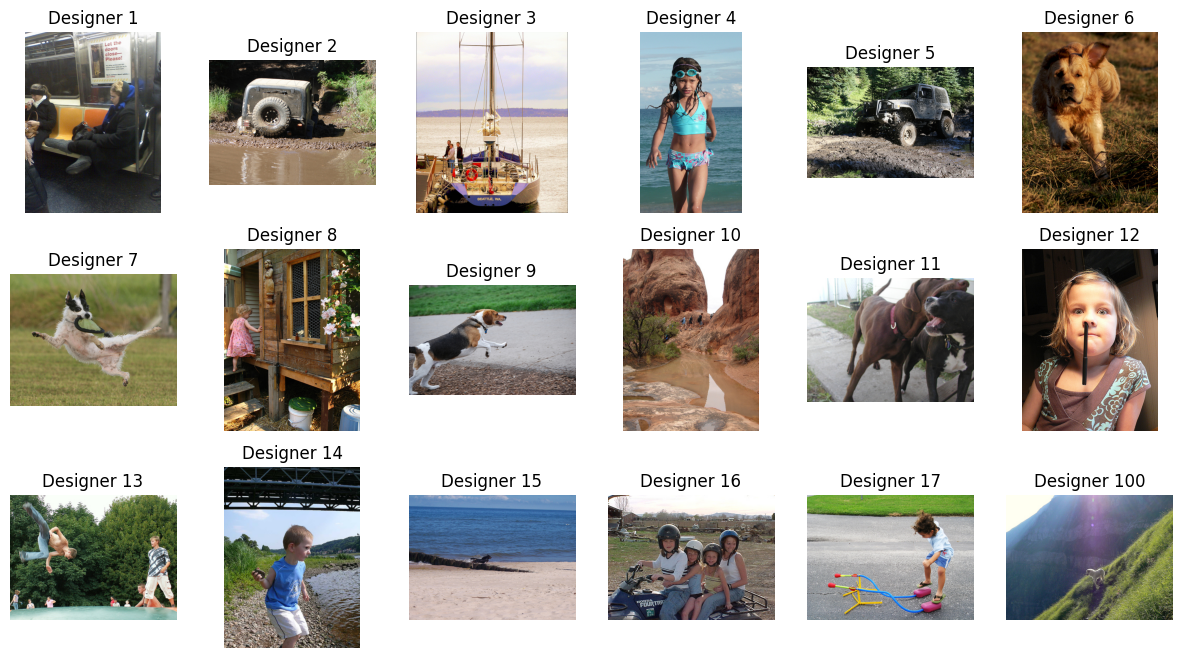

In [5]:
# Display sample images with captions
plt.figure(figsize=(15, 8))

num_images = len(image_paths)
num_rows = 3
num_cols = 6
num_subplots = num_rows * num_cols

for i, image_path in enumerate(image_paths, 1):
    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Convert BGR to RGB (OpenCV uses BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.subplot(num_rows, num_cols, i if i <= num_subplots else num_subplots)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Designer {i}')

# Add empty subplots for remaining images if needed
for i in range(num_images + 1, num_subplots + 1):
    plt.subplot(num_rows, num_cols, i)
    plt.axis('off')

plt.show()

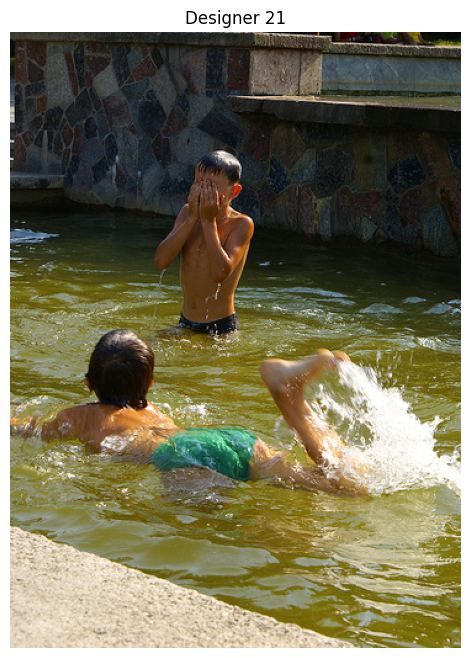

In [6]:
# Display the 18th image with caption
plt.figure(figsize=(8, 8))

# Select the 18th image path
image_path = image_paths[20]  # Index 20 corresponds to the 21st image (0-based index)

# Read the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title('Designer 21')

plt.show()

# Image Captioning 📝📸

In [7]:
import os

# Load the pre-trained image captioning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

# Function to perform image captioning
def generate_caption(model, processor, image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Tokenize and generate caption
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)

    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Loop through all images and generate captions
for i, image_path in enumerate(image_paths, 1):
    # Extract the file name from the image path
    file_name = os.path.basename(image_path)
    
    # Generate the caption
    predicted_caption = generate_caption(model, processor, image_path)
    
    # Print the caption with the correct file name
    print(f"Caption for {file_name}: {predicted_caption}")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption for Designer0061.jpg: people sitting on a subway train
Caption for Designer0026.jpg: mud puddles in the mud
Caption for Designer0066.jpg: a boat in the water
Caption for Designer0094.jpg: a girl in a bikini
Caption for Designer0041.jpg: a muddy road
Caption for Designer0052.jpg: a dog running in the grass
Caption for Designer0068.jpg: a dog jumping in the air
Caption for Designer0001.jpg: a little girl in a pink dress
Caption for Designer0006.jpg: a dog running on a path
Caption for Designer0073.jpg: a large rock formation
Caption for Designer0087.jpg: two dogs standing on a sidewalk
Caption for Designer0100.jpg: a little girl with a tooth brush in her mouth
Caption for Designer0012.jpg: a man doing a trick on a skateboard
Caption for Designer0029.jpg: a young boy standing on a rocky shore
Caption for Designer0080.jpg: a dog on the beach
Caption for Designer0034.jpg: three children on a motorcycle
Caption for Designer0008.jpg: a little girl playing with a toy
Caption for Design

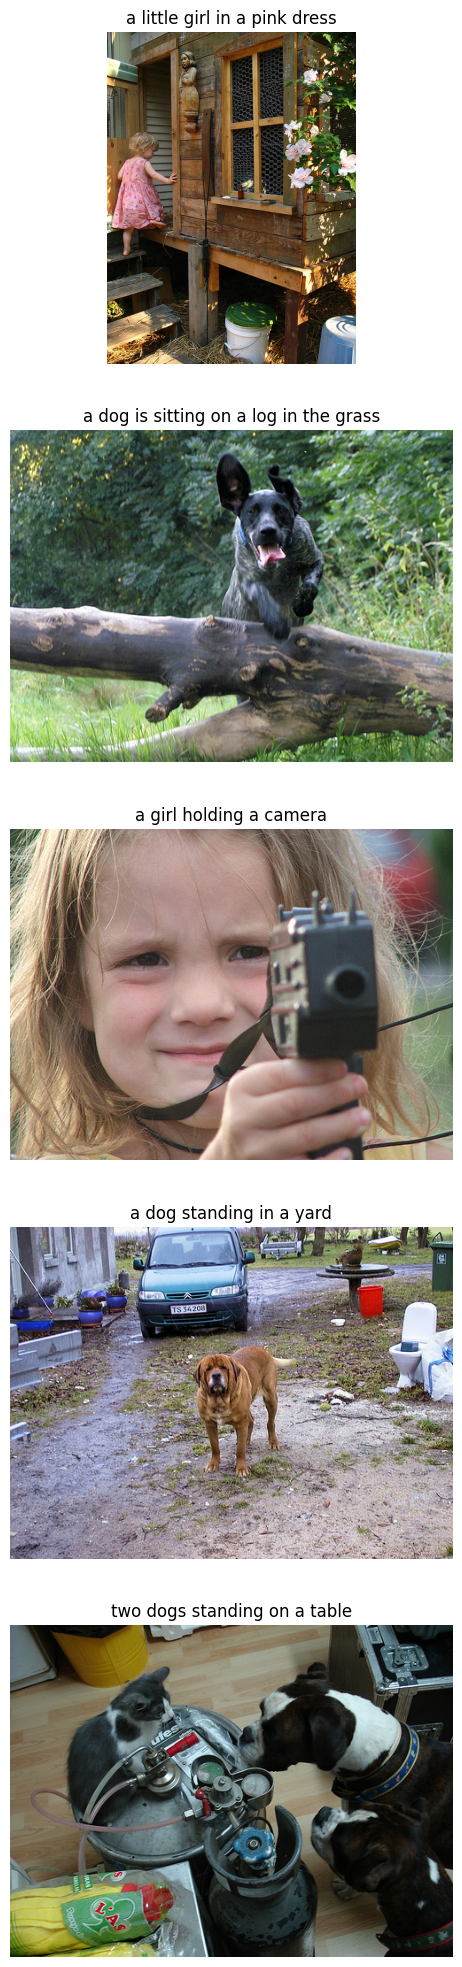

In [10]:
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the pre-trained image captioning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

# Function to perform image captioning
def generate_caption(model, processor, image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Tokenize and generate caption
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)

    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# List of image paths (add more paths if needed)
image_paths = [
    '/kaggle/input/flick1k-dataset/1000 images/Designer0001.jpg',
    '/kaggle/input/flick1k-dataset/1000 images/Designer0002.jpg',
    '/kaggle/input/flick1k-dataset/1000 images/Designer0003.jpg',
    '/kaggle/input/flick1k-dataset/1000 images/Designer0004.jpg',
    '/kaggle/input/flick1k-dataset/1000 images/Designer0005.jpg'
    # Add up to 10 paths if desired
]

# Display captions for each image in the list
plt.figure(figsize=(10, 5 * len(image_paths)))  # Adjust the size based on the number of images

for i, image_path in enumerate(image_paths, 1):
    # Generate caption for the current image
    predicted_caption = generate_caption(model, processor, image_path)

    # Read and display the image with its caption
    img = mpimg.imread(image_path)
    plt.subplot(len(image_paths), 1, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{predicted_caption}')

plt.show()


# Face Detection 👤 , Pose and Hand Detection 🤸‍♂️✋

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1731563039.882249    1759 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731563039.909708    1759 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731563040.063330    1761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731563040.104874    1761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731563040.128069    1761 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
W0000 00:

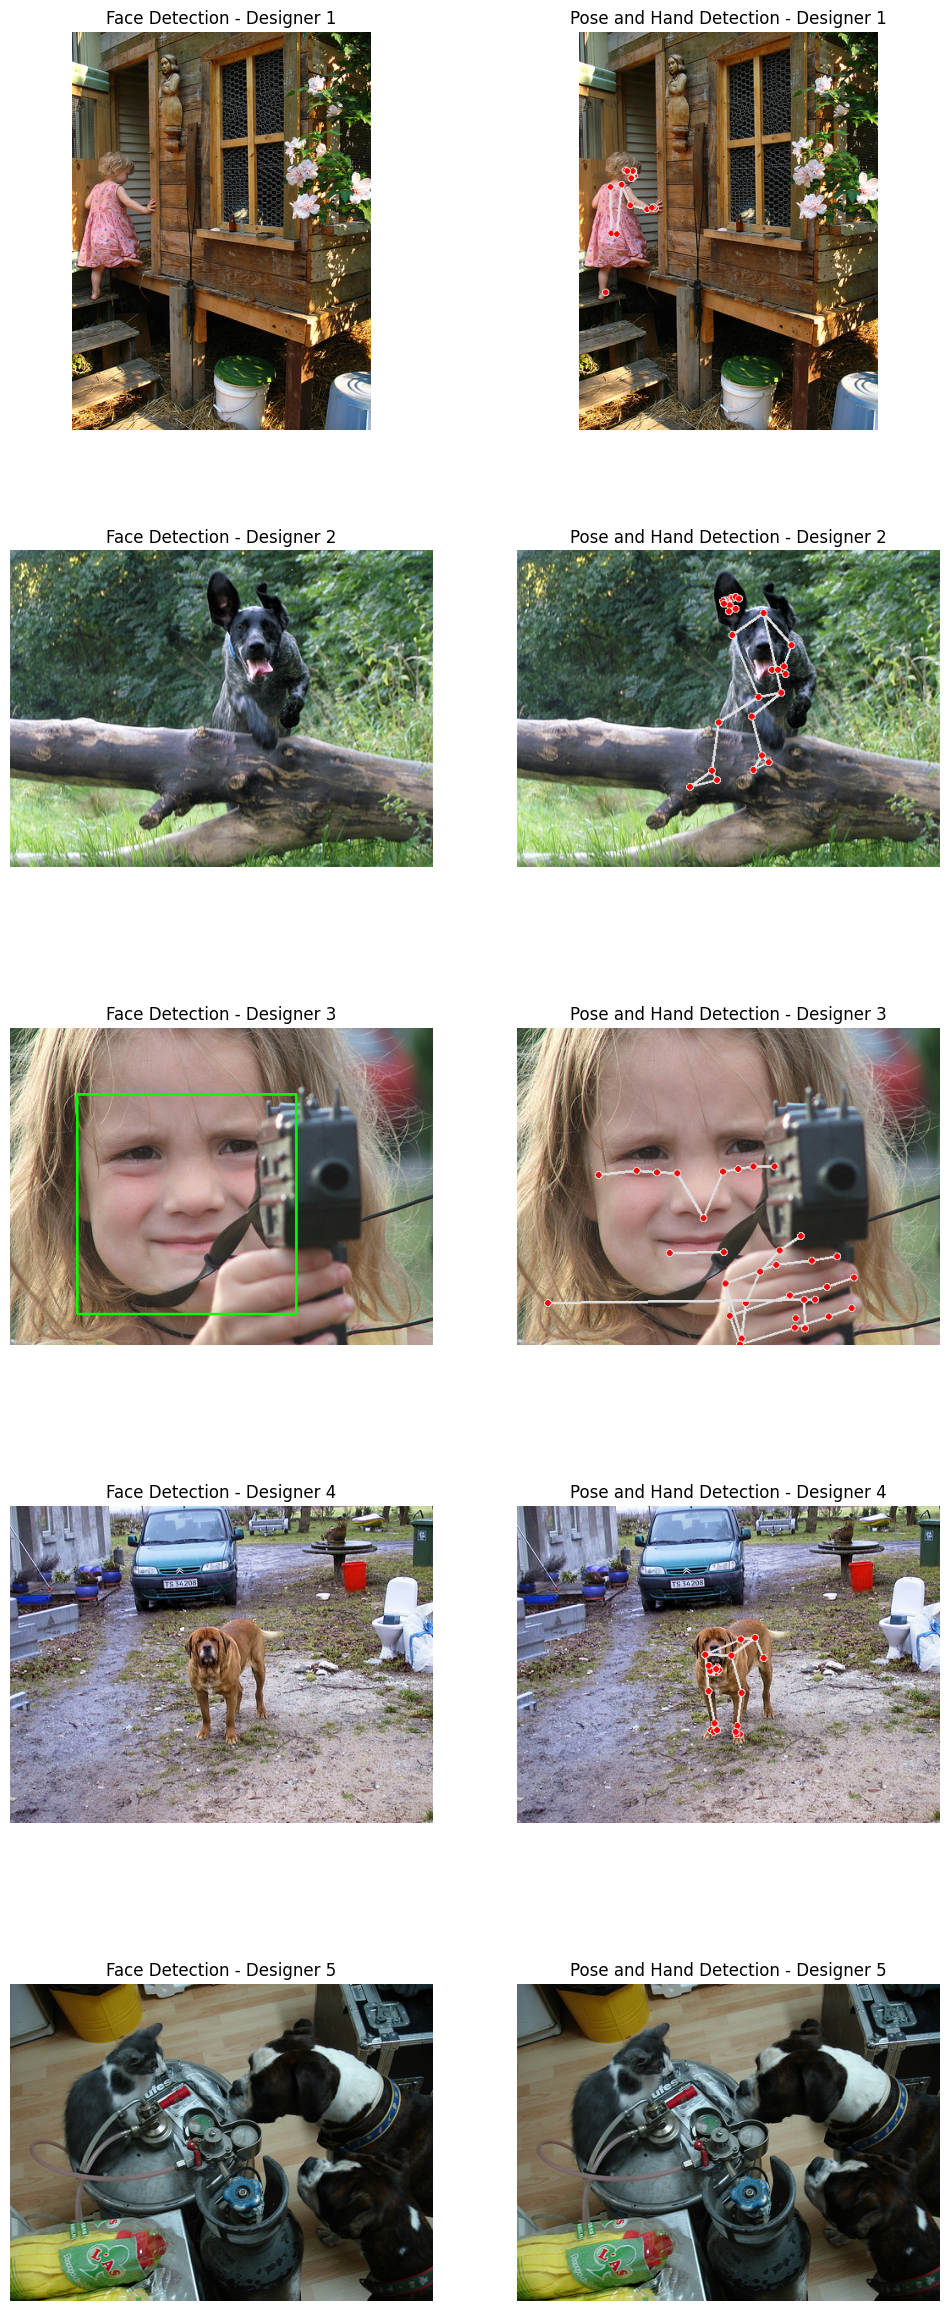

In [11]:
import cv2
import dlib
import mediapipe as mp
import matplotlib.pyplot as plt

# Load the face detection model from dlib
detector = dlib.get_frontal_face_detector()

# Load the mediapipe hands and pose models
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

# Function to perform face detection
def detect_face(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces using dlib
    faces = detector(gray)

    # Draw rectangles around detected faces
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return img

# Function to perform pose and hand detection using mediapipe
def detect_pose_and_hands(image_path):
    img = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Use mediapipe for hand detection
    with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
        results = hands.process(rgb_img)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Use mediapipe for pose detection
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(rgb_img)
        if results.pose_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return img

# Display only a sample of images (e.g., 5 images) with detections
sample_size = 5  # Change this number to show more or fewer examples
sample_image_paths = image_paths[:sample_size]

plt.figure(figsize=(12, 6 * sample_size))

for i, image_path in enumerate(sample_image_paths, 1):
    # Detect faces in the current image
    image_with_faces = detect_face(image_path)

    # Detect pose and hands in the current image
    image_with_pose_and_hands = detect_pose_and_hands(image_path)

    # Display the images
    plt.subplot(sample_size, 2, i * 2 - 1)
    plt.imshow(cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB))
    plt.title(f'Face Detection - Designer {i}')
    plt.axis('off')

    plt.subplot(sample_size, 2, i * 2)
    plt.imshow(cv2.cvtColor(image_with_pose_and_hands, cv2.COLOR_BGR2RGB))
    plt.title(f'Pose and Hand Detection - Designer {i}')
    plt.axis('off')

plt.show()


In [13]:
from nltk.translate.bleu_score import sentence_bleu

# Function to calculate Self-BLEU for diversity
def calculate_self_bleu(captions):
    bleu_scores = []
    for i, candidate in enumerate(captions):
        references = captions[:i] + captions[i + 1:]  # All other captions as references
        score = sentence_bleu([ref.split() for ref in references], candidate.split())
        bleu_scores.append(score)
    return sum(bleu_scores) / len(bleu_scores)

# Example usage
captions = [
    generate_caption(model, processor, path) for path in image_paths
]

self_bleu_score = calculate_self_bleu(captions)
print(f"Self-BLEU Score: {self_bleu_score}")


Self-BLEU Score: 0.6351251263783103


In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load a pre-trained model to generate sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for all captions
embeddings = model.encode(captions)

# Calculate pairwise cosine similarities between all captions
similarity_matrix = cosine_similarity(embeddings)

# Calculate average similarity (higher values indicate less diversity)
average_similarity = (np.sum(similarity_matrix) - len(captions)) / (len(captions) * (len(captions) - 1))

# Diversity score (1 - average similarity)
diversity_score = 1 - average_similarity
print(f"Diversity Score (Cosine Similarity): {diversity_score}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Diversity Score (Cosine Similarity): 0.8475144863128662
